In [1]:
import numpy as np
import pandas as pd

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
players = pd.read_csv("WorldCupPlayers.csv")
matches = pd.read_csv("WorldCupMatches.csv")
world_cup = pd.read_csv("WorldCups.csv")

In [7]:
matches.sample(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
104,1958,08 Jun 1958 - 19:00,Group 3,Jarnvallen,Sandviken,Hungary,1,1,Wales,,15343.0,1,1,CODESAL Jose Maria (URU),LEMESIC Leo (YUG),VAN NUFFEL Lucien (BEL),220,1407,HUN,WAL
225,1970,14 Jun 1970 - 12:00,Quarter-finals,Nou Camp - Estadio Le�n,Leon,Germany FR,3,2,England,Germany FR win after extra time,23357.0,0,0,COEREZZA Norberto Angel (ARG),VELASQUEZ Guillermo (COL),ORTIZ DE MENDIBIL Jose Maria (ESP),251,1811,FRG,ENG
822,2014,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2,0,Nigeria,,67882.0,0,0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951,300186462,FRA,NGA
804,2014,23 Jun 2014 - 13:00,Group B,Arena da Baixada,Curitiba,Australia,0,3,Spain,,39375.0,0,1,SHUKRALLA Nawaf (BHR),TULEFAT Yaser (BHR),SALEH Ebrahim (BHR),255931,300186467,AUS,ESP
651,2006,11 Jun 2006 - 21:00,Group D,"FIFA World Cup Stadium, Cologne",Cologne,Angola,0,1,Portugal,,45000.0,0,1,LARRIONDA Jorge (URU),RIAL Walter (URU),FANDINO Pablo (URU),97410100,97410008,ANG,POR


In [8]:
players.sample(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
17810,3468,422,BEL,THYS Guy (BEL),S,22,Patrick VERVOORT,NaN,NaN
37637,255955,300186474,GER,LOEW Joachim (GER),N,15,DURM,NaN,NaN
14869,293,902,NIR,BINGHAM Billy (NIR),N,14,Tommy CASSIDY,NaN,I50'
27861,43950300,43950057,BRA,SCOLARI Luiz Felipe (BRA),S,6,R CARLOS,NaN,NaN
35536,255931,300186483,USA,KLINSMANN Juergen (GER),S,7,BEASLEY,NaN,NaN


In [11]:
world_cup.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [14]:
# Get an overview of each dataset
world_cup.info()
matches.info()
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage

In [19]:
# Check for missing values
world_cup.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [20]:
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [21]:
players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [22]:
world_cup.duplicated().sum()

0

In [23]:
matches.duplicated().sum()

16

In [24]:
players.duplicated().sum()

736

In [25]:
#Dropping Unnecessary columns in the Players dataset
players.drop(columns=['Position', 'Event'], inplace=True)
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI


In [27]:
#Removing duplicate rows from matches dataset
matches.drop_duplicates(inplace=True)
matches.duplicated().sum()

0

In [28]:
#Removing duplicate rows from players dataset
players.drop_duplicates(inplace=True)
players.duplicated().sum()

0

In [29]:
world_cup.shape

(20, 10)

In [30]:
matches.shape

(836, 20)

In [31]:
players.shape

(37048, 7)

#  Most World Cup winning Teams

In [32]:
Winner = world_cup['Winner'].value_counts()
Winner

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

# No. of Goals scored by each country

In [33]:
home = matches[['Home Team Name', 'Home Team Goals']]
away = matches[['Away Team Name', 'Away Team Goals']]

In [34]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [41]:
goals = pd.concat([home, away], ignore_index=True)

In [128]:
goals = goals.groupby('Countries').sum()
goals = goals.sort_values(by = 'Goals', ascending=False)
goals


,Goals
Countries,
Brazil,221
Argentina,131
Germany FR,131
Italy,128
France,106
...,...
Dutch East Indies,0
China PR,0
Canada,0


<Figure size 1000x1000 with 0 Axes>

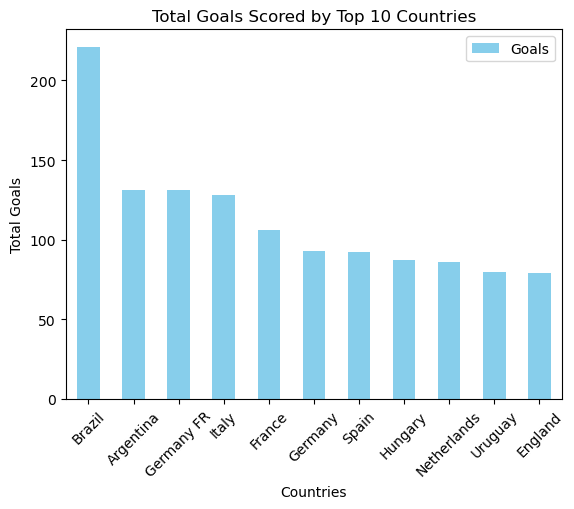

In [60]:
plt.figure(figsize=(10,10))
goals[:11].plot(kind='bar', color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

# Match outcome by home and away teams

In [61]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [62]:
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [63]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,Home Team Win
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,Home Team Win
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,Home Team Win
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,Home Team Win
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,Home Team Win


In [66]:
matches['outcome'].value_counts()

Home Team Win    479
DRAW             186
Away Team Win    171
Name: outcome, dtype: int64

In [94]:
labels=['Home Team Win','Away Team Win','DRAW' ]
sizes=[479,171,186]

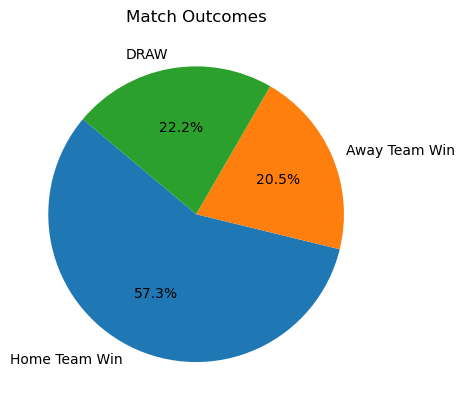

In [100]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Match Outcomes')
plt.show()

# Stadium with Highest Average Attendance

In [86]:
average_attendance = matches.groupby(['Stadium', 'City'])['Attendance'].mean()

In [87]:
highest_avg_attendance_stadium = average_attendance.idxmax()
highest_avg_attendance_value = average_attendance.max()

In [88]:
top_10_stadiums = average_attendance.sort_values(ascending=False)
top_10_stadiums.head(10)

Stadium                                    City                
Maracan� - Est�dio Jornalista M�rio Filho  Rio De Janeiro          101692.625000
Estadio Azteca                             Mexico City             100923.684211
Rose Bowl                                  Los Angeles              92600.875000
Wembley Stadium                            London                   86448.222222
Soccer City Stadium                        Johannesburg             83857.375000
Santiago Bernabeu                          Madrid                   82522.250000
Stanford Stadium                           San Francisco            81737.333333
Stade de France                            Saint-Denis              78222.222222
Estadio do Maracana                        Rio De Janeiro           74169.857143
Giants Stadium                             New York/New Jersey      73689.714286
Name: Attendance, dtype: float64

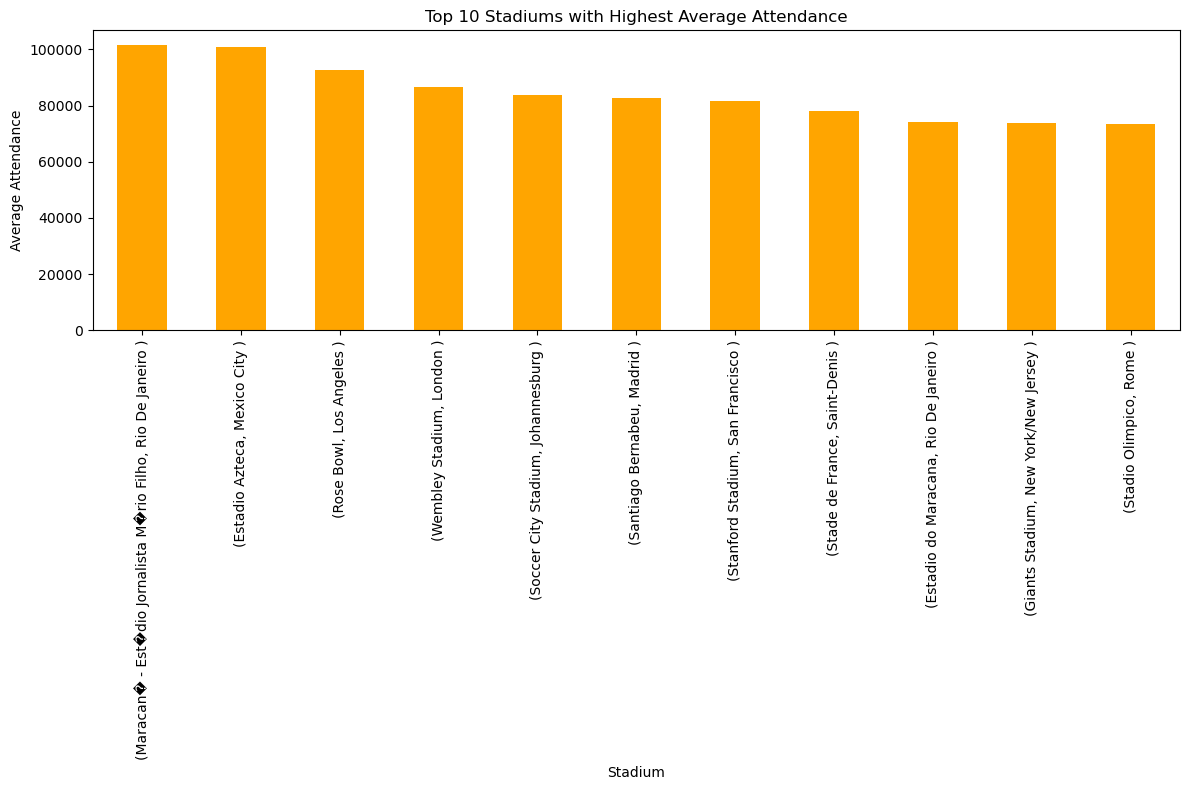

In [93]:
plt.figure(figsize=(12, 8))
top_10_stadiums[:11].plot(kind='bar', color='orange')
plt.xlabel('Stadium')
plt.ylabel('Average Attendance')
plt.title('Top 10 Stadiums with Highest Average Attendance')
plt.xticks(rotation=90)
plt.tight_layout()

Downloading the cleaned dataset for visualizing dashboards

In [124]:
matches.to_csv('matches-filtered.csv')

In [125]:
players.to_csv('players-filtered.csv')